In [27]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
sns.set_theme(style = "darkgrid", font = "monospace")

Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')
Population Mean:  112.35
Gender Count:  Gender
Female    20
Male      20
dtype: int64
Average MRI_count gender specific:  Gender
Female    13.667770
Male      13.769315
Name: MRI_Count, dtype: float64


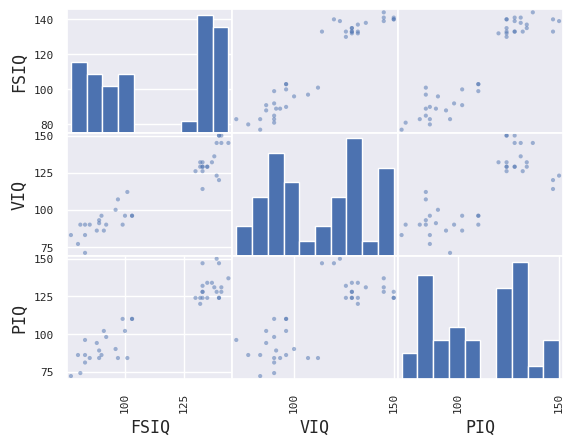

In [28]:
brain_size = pd.read_csv("data/brain_size.csv", sep = ";", na_values = '.', index_col = 0)
print(brain_size.columns)

print("Population Mean: ", brain_size.VIQ.mean())
print("Gender Count: ", brain_size.groupby("Gender").size())
print("Average MRI_count gender specific: ", brain_size.groupby("Gender")["MRI_Count"].apply(lambda x: np.log(np.mean(x))))

pd.plotting.scatter_matrix(brain_size[['FSIQ', 'VIQ', 'PIQ']]);

In [29]:
# Technically, the p-value of the t-test is derived under the assumption that 
# the means of samples drawn from the population are normally distributed. 
# This condition is exactly satisfied when the population itself is normally 
# distributed; however, due to the central limit theorem, the condition is 
# nearly true for reasonably large samples drawn from populations that follow
# a variety of non-normal distributions.

#### Exercise

- Test the difference between weights in males and females.

- Use non parametric statistics to test the difference between VIQ in males and females.

- Conclusion: we find that the data does not support the hypothesis that males and females have different VIQ.

In [15]:
# p-value that the data is as extreme as the sample assuming no difference is pretty low, asking for a null hypothesis rejection.
# Thus there is a difference in the inter-gender brain weights, and the difference is statistically significant.
sp.stats.ttest_ind(brain_size[brain_size.Gender=="Male"]["Weight"].dropna(), brain_size[brain_size.Gender=="Female"]["Weight"].dropna())

TtestResult(statistic=np.float64(4.870950921940696), pvalue=np.float64(2.227293018362118e-05), df=np.float64(36.0))

In [24]:
# p-value is a healthy 0.34, thus the null hypothesis of the VIQ being same for both the genders cannot be rejected based on the given sample.
sp.stats.mannwhitneyu(brain_size[brain_size.Gender=="Male"]["VIQ"].dropna().values, brain_size[brain_size.Gender=="Female"]["VIQ"].dropna().values)

MannwhitneyuResult(statistic=np.float64(235.5), pvalue=np.float64(0.3422886868727315))

### Exercise

Retrieve the estimated parameters from the model above. Hint: use tab-completion to find the relevant attribute.

In [38]:
x = np.linspace(-5, 5, 20)
rng = np.random.default_rng(27446968)
y = -5 + 3*x + 4 * rng.normal(size=x.shape)
data = pd.DataFrame({'x': x, 'y': y})

model = smf.ols(formula= 'y ~ x', data = data).fit()
model.summary()


model.params

Intercept   -4.294824
x            3.205979
dtype: float64

### Exercise

Going back to the brain size + IQ data, test if the VIQ of male and female are different after removing the effect of brain size, height and weight.


In [44]:
model = smf.ols("VIQ ~ Gender + Weight + Height ", data = brain_size).fit()
model.summary()



# the p-value for the beta coefficient relating to variation of VIQ with gender is 0.068, it cannot be rejected at 5% significance level. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.369
Date:                Mon, 18 Nov 2024   Prob (F-statistic):              0.269
Time:                        16:38:19   Log-Likelihood:                -170.29
No. Observations:                  38   AIC:                             348.6
Df Residuals:                      34   BIC:                             355.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        261.8374     88.157      2.970      0.005      82.680     440.995
Gender[T.Male]    20.4303     10.822      1.888      0.068      -1.562      42.423
Weight            -0.1012      0.230     -0.441      0.662      -0.568       0.366
Height            -2.1059      1.490     -1.414      0.167      -5.134       0.922
==============================================================================
Omnibus:                        7.582   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                2.540
Skew:                          -0.231   Prob(JB):                        0.281
Kurtosis:                       1.820   Cond. No.                     4.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

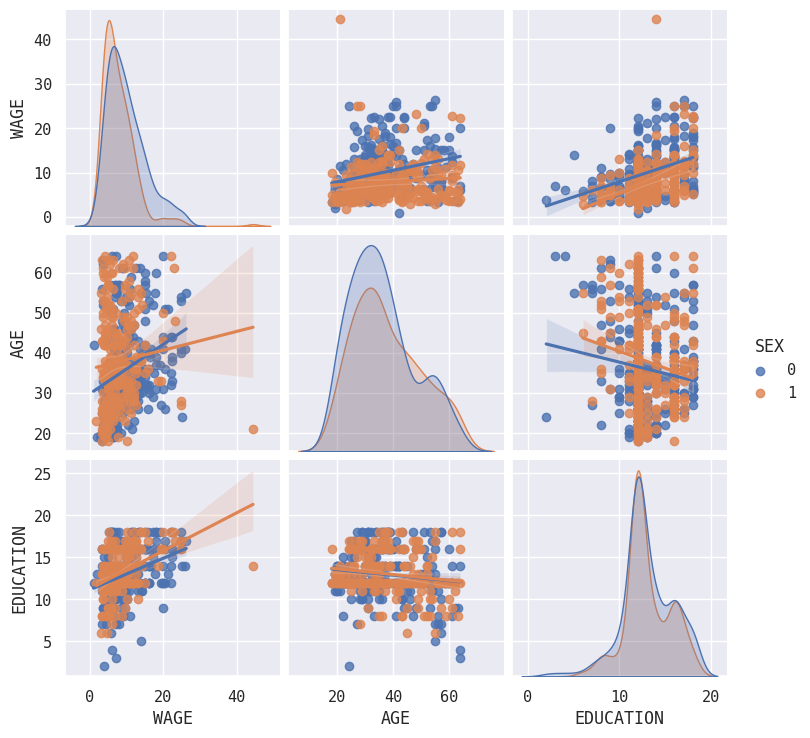

In [55]:
# Give names to the columns
names = [
    "EDUCATION: Number of years of education",
    "SOUTH: 1=Person lives in South, 0=Person lives elsewhere",
    "SEX: 1=Female, 0=Male",
    "EXPERIENCE: Number of years of work experience",
    "UNION: 1=Union member, 0=Not union member",
    "WAGE: Wage (dollars per hour)",
    "AGE: years",
    "RACE: 1=Other, 2=Hispanic, 3=White",
    "OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other",
    "SECTOR: 0=Other, 1=Manufacturing, 2=Construction",
    "MARR: 0=Unmarried,  1=Married",
]

short_names = [n.split(":")[0] for n in names]

data = pd.read_csv(
    "data/wages.txt", skiprows=27, skipfooter=6, sep=None, header=None, engine="python"
)
data.columns = pd.Index(short_names)
data

sns.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue = "SEX");